In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from google.colab import drive
from scipy.stats import expon, kstest
import matplotlib.pyplot as plt
from scipy.stats import chisquare, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import plotly.graph_objects as go

In [2]:
drive.mount('/content/drive')
dataset_columns = ['Product Code', 'Product Name', 'Num. Bought Pieces', 'Cost', 'Num. of Sold Pieces','Price']

df = pd.read_csv('/content/CS210_Project_Dataset.csv', names=dataset_columns)
df = df.drop(0)

df

Mounted at /content/drive


,Product Code,Product Name,Num. Bought Pieces,Cost,Num. of Sold Pieces,Price
1,0001,Gümüş Yıldız Küpe,15,"35,00",10,125
2,0002,Gümüş Üçlü İç İçe Halka Küpe,15,"35,00",6,125
3,0003,Altın Üçlü İç İçe Halka Küpe,15,"35,00",5,125
4,0004,Gümüş Üçlü Halk Küpe,15,"35,00",9,125
5,0005,Gümüş Üçlü Halk Küpe,15,"35,00",9,125
...,...,...,...,...,...,...
81,2026,Altın Zincir Orta Taşlı,20,"45,00",5,200
82,2027,Altın Zincir İnce Taşlı,20,"45,00",15,200
83,2028,Gümüş Zincir Kalın Taşlı,20,"45,00",17,200
84,2029,Gümüş Zincir Orta Taşlı,20,"45,00",9,200


In [3]:
print(df.describe())
print(df.isnull().sum())
print(df.dtypes)

       Product Code          Product Name Num. Bought Pieces   Cost  \
count            85                    85                 85     85   
unique           84                    83                 12     16   
top            2024  Gümüş Üçlü Halk Küpe                 20  45,00   
freq              2                     2                 22     33   

       Num. of Sold Pieces Price  
count                   85    85  
unique                  23    10  
top                      4   150  
freq                     9    20  
Product Code           0
Product Name           0
Num. Bought Pieces     0
Cost                   0
Num. of Sold Pieces    0
Price                  0
dtype: int64
Product Code           object
Product Name           object
Num. Bought Pieces     object
Cost                   object
Num. of Sold Pieces    object
Price                  object
dtype: object


In [4]:
#Data Arrangment
df["Cost"] = df["Cost"].str.replace(',', '').astype(int)
df["Cost"] = df["Cost"] / 100
df['Num. Bought Pieces'] = df['Num. Bought Pieces'].astype(int)
df['Price'] = df['Price'].astype(int)
df['Num. of Sold Pieces'] = df['Num. of Sold Pieces'].astype(int)

df.head()

,Product Code,Product Name,Num. Bought Pieces,Cost,Num. of Sold Pieces,Price
1,0001,Gümüş Yıldız Küpe,15,35.0,10,125
2,0002,Gümüş Üçlü İç İçe Halka Küpe,15,35.0,6,125
3,0003,Altın Üçlü İç İçe Halka Küpe,15,35.0,5,125
4,0004,Gümüş Üçlü Halk Küpe,15,35.0,9,125
5,0005,Gümüş Üçlü Halk Küpe,15,35.0,9,125


In [5]:
#Adding new coloumns
df['Money Spent'] = df['Num. Bought Pieces'] * df['Cost']
df['Money Earned'] = df['Num. of Sold Pieces'] * df['Price']
df['Last Stock'] = df['Num. Bought Pieces'] - df['Num. of Sold Pieces']

df

,Product Code,Product Name,Num. Bought Pieces,Cost,Num. of Sold Pieces,Price,Money Spent,Money Earned,Last Stock
1,0001,Gümüş Yıldız Küpe,15,35.0,10,125,525.0,1250,5
2,0002,Gümüş Üçlü İç İçe Halka Küpe,15,35.0,6,125,525.0,750,9
3,0003,Altın Üçlü İç İçe Halka Küpe,15,35.0,5,125,525.0,625,10
4,0004,Gümüş Üçlü Halk Küpe,15,35.0,9,125,525.0,1125,6
5,0005,Gümüş Üçlü Halk Küpe,15,35.0,9,125,525.0,1125,6
...,...,...,...,...,...,...,...,...,...
81,2026,Altın Zincir Orta Taşlı,20,45.0,5,200,900.0,1000,15
82,2027,Altın Zincir İnce Taşlı,20,45.0,15,200,900.0,3000,5
83,2028,Gümüş Zincir Kalın Taşlı,20,45.0,17,200,900.0,3400,3
84,2029,Gümüş Zincir Orta Taşlı,20,45.0,9,200,900.0,1800,11


P-value: 0.03438586341279116


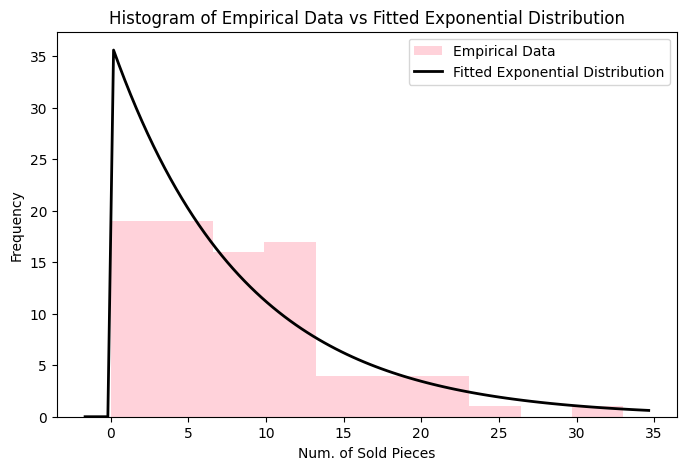

Reject H0: The data does not fit the exponential distribution.


In [6]:
loc, scale = expon.fit(df['Num. of Sold Pieces'])

samples = expon.rvs(loc=loc, scale=scale, size=len(df['Num. of Sold Pieces']))
ks_statistic, ks_p_value = kstest(df['Num. of Sold Pieces'], 'expon', args=(loc, scale))

print(f'P-value: {ks_p_value}')

plt.figure(figsize=(8, 5))

plt.hist(df['Num. of Sold Pieces'], bins=10, color='pink', alpha=0.7, label='Empirical Data')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = expon.pdf(x, loc=loc, scale=scale) * len(df) * (xmax - xmin) / 10
plt.plot(x, p, 'k', linewidth=2, label='Fitted Exponential Distribution')

plt.title('Histogram of Empirical Data vs Fitted Exponential Distribution')
plt.xlabel('Num. of Sold Pieces')
plt.ylabel('Frequency')
plt.legend()
plt.show()

if ks_p_value < 0.05:
    print('Reject H0: The data does not fit the exponential distribution.')
else:
    print('Fail to Reject H0: The data fits the exponential distribution.')

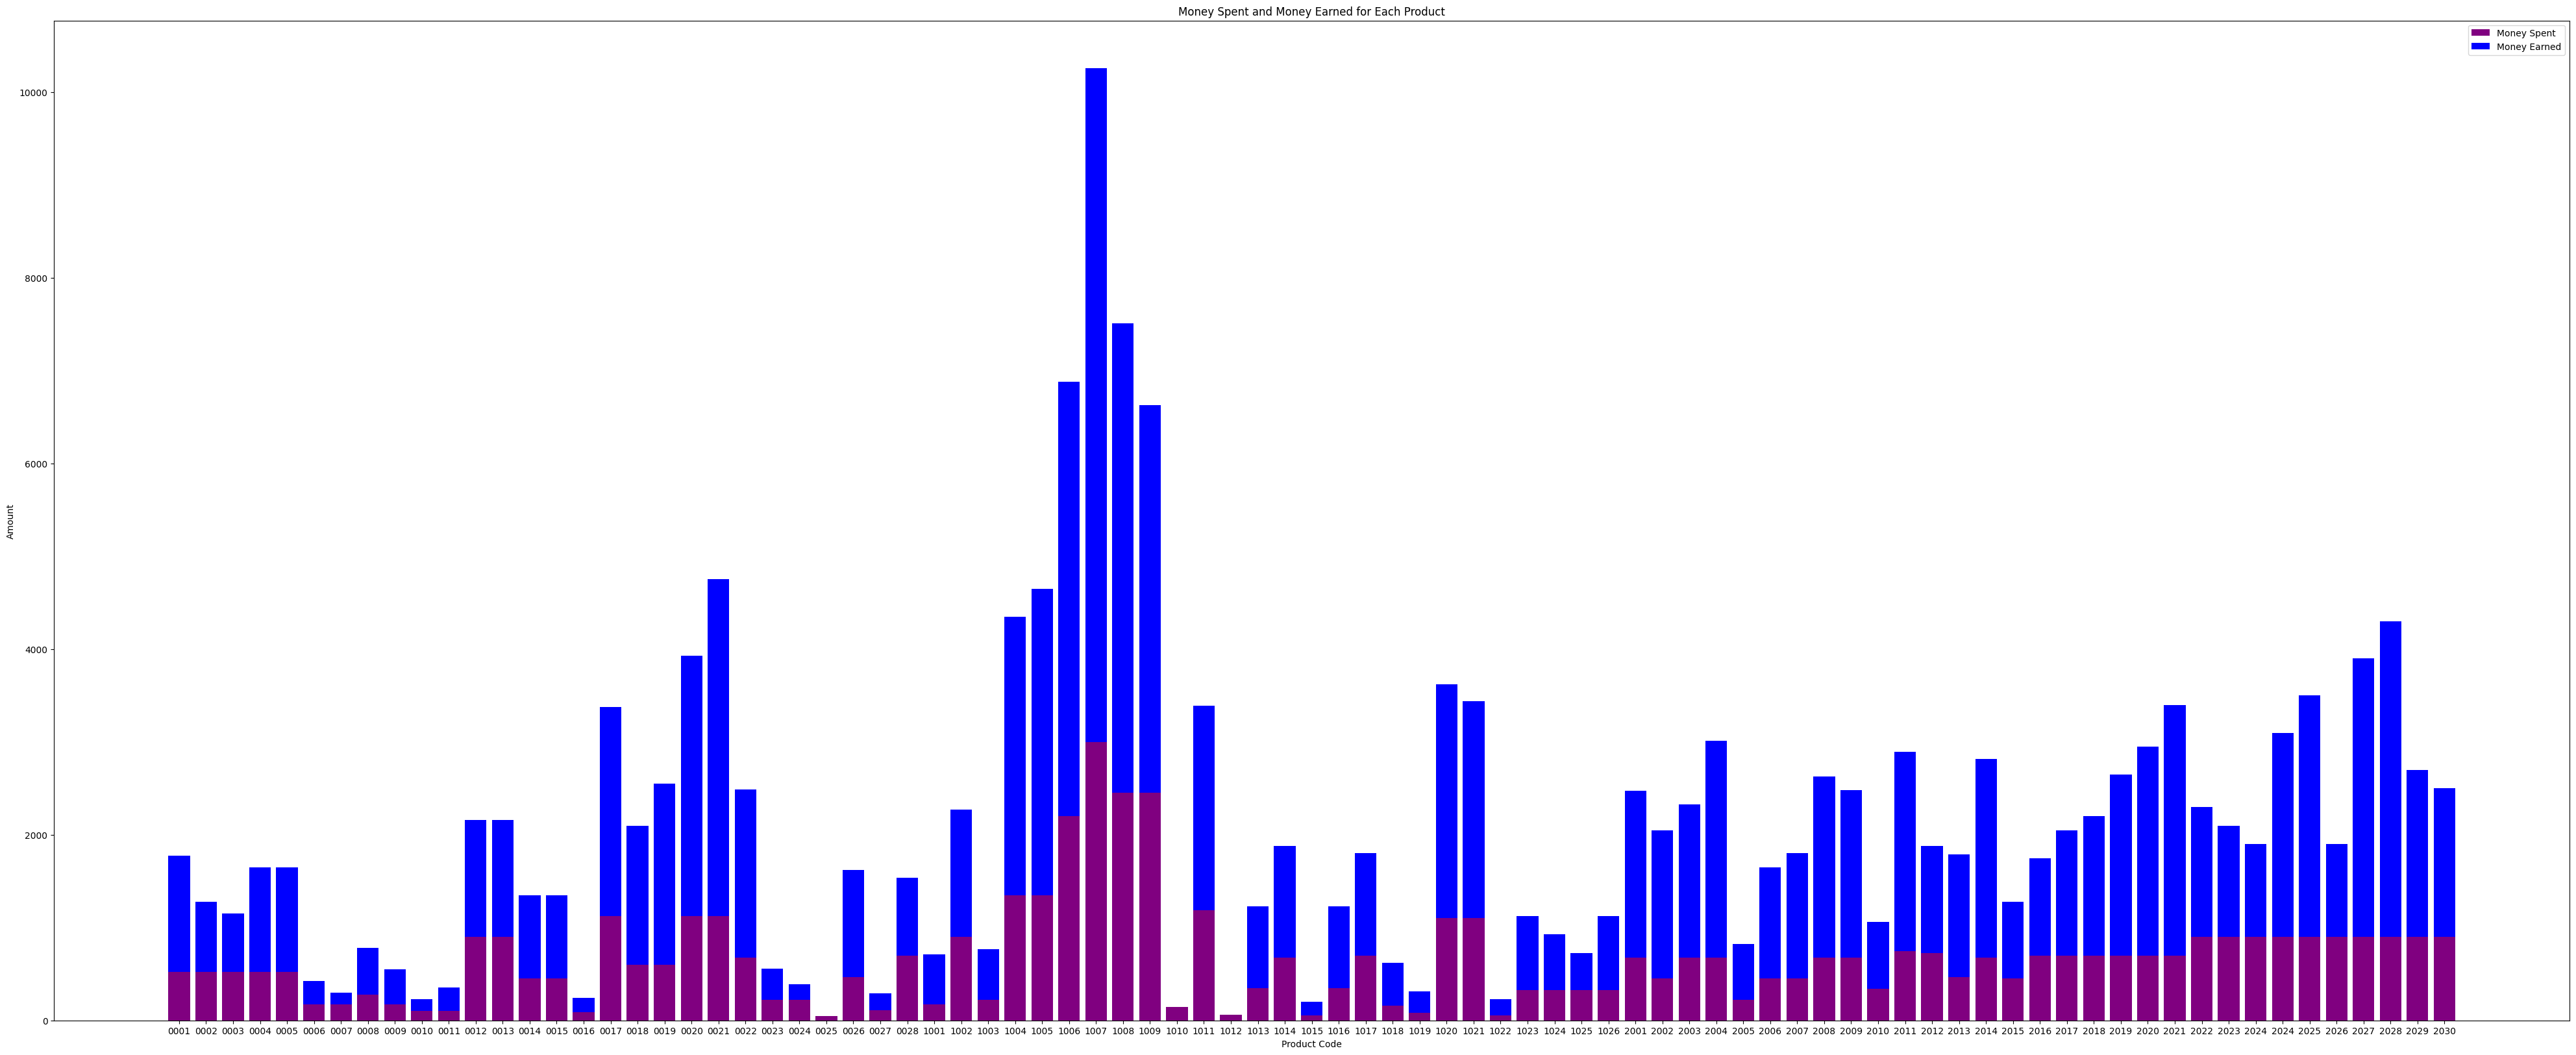

In [7]:
index = np.arange(len(df['Product Code']))

plt.figure(figsize=(50, 20))

plt.bar(index, df['Money Spent'], color='purple', label='Money Spent')
plt.bar(index, df['Money Earned'], bottom=df['Money Spent'], color='blue', label='Money Earned')

plt.title('Money Spent and Money Earned for Each Product')
plt.xlabel('Product Code')
plt.ylabel('Amount')
plt.xticks(index, df['Product Code'])
plt.legend()
plt.show()

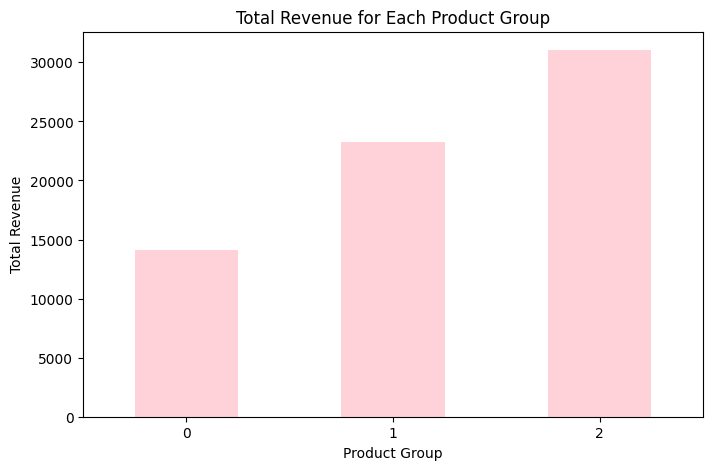

In [8]:
df['Revenue'] = df['Money Earned'] - df['Money Spent']

df['Product Group'] = df['Product Code'].astype(str).str[0]

grouped_revenue = df.groupby('Product Group')['Revenue'].sum()

plt.figure(figsize=(8, 5))
grouped_revenue.plot(kind='bar', color='pink', alpha=0.7)
plt.title('Total Revenue for Each Product Group')
plt.xlabel('Product Group')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()


In [9]:
total_revenue = df["Revenue"].sum()
print(total_revenue)

68434.25


In [10]:
top_3_highest = df.nlargest(3, 'Revenue')
print("Top 3 Highest Revenue Products:")
print(top_3_highest[['Product Code', 'Product Name', 'Revenue']])

top_3_lowest = df.nsmallest(3, 'Revenue')
print("\nTop 3 Lowest Revenue Products:")
print(top_3_lowest[['Product Code', 'Product Name', 'Revenue']])

Top 3 Highest Revenue Products:
   Product Code                Product Name  Revenue
35         1007       Altın Su Yolu Bilezik   4260.0
36         1008  Gümüş Sprial Taşlı Bilezik   2610.0
21         0021               Altın Su Yolu   2505.0

Top 3 Lowest Revenue Products:
   Product Code               Product Name  Revenue
38         1010        Kalın Kelepçe Gonca   -144.5
24         0024  Altın Taşlı Karemsi Halka    -60.0
40         1012              Altın Pandora    -59.5


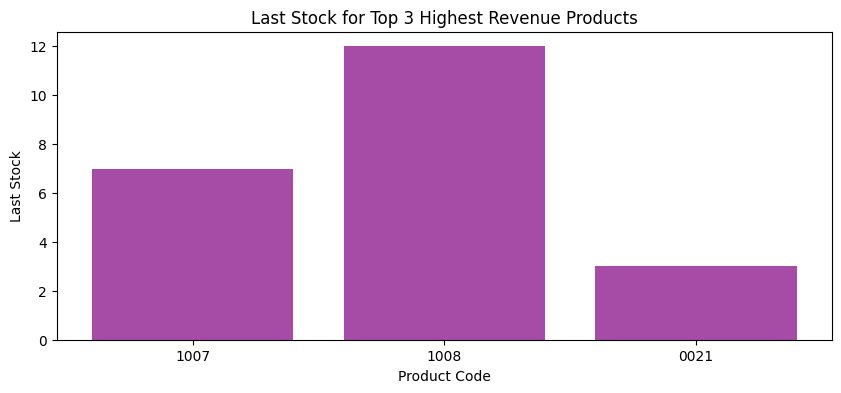

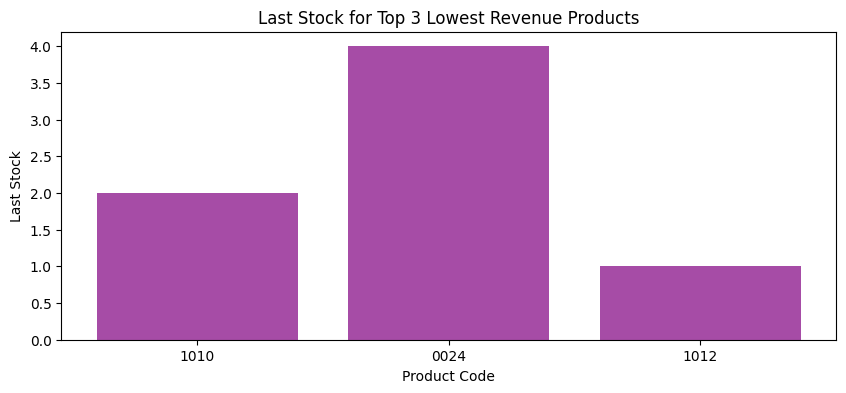

In [11]:
def plot_last_stock(product_df, title):
    plt.figure(figsize=(10, 4))
    plt.bar(product_df['Product Code'], product_df['Last Stock'], color='purple', alpha=0.7)
    plt.title(title)
    plt.xlabel('Product Code')
    plt.ylabel('Last Stock')
    plt.show()

# Plot for Top 3 Highest Revenue Products
plot_last_stock(top_3_highest, 'Last Stock for Top 3 Highest Revenue Products')

# Plot for Top 3 Lowest Revenue Products
plot_last_stock(top_3_lowest, 'Last Stock for Top 3 Lowest Revenue Products')

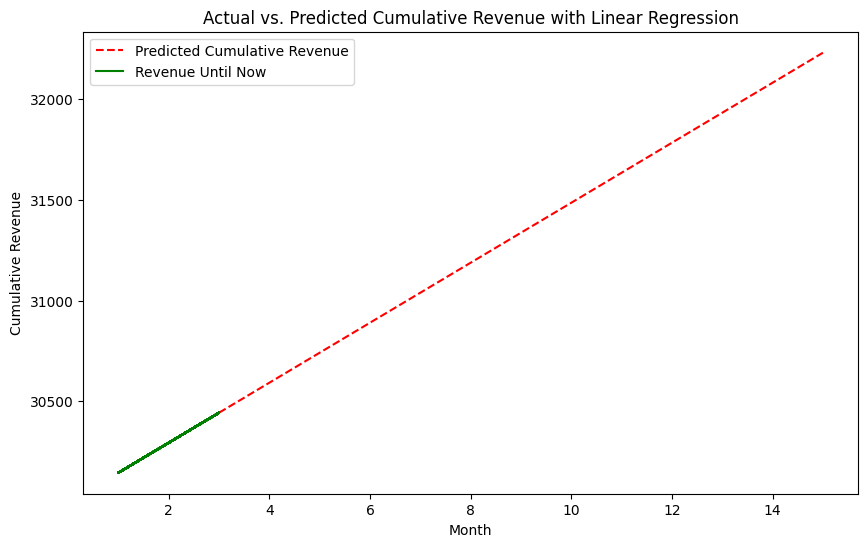

In [12]:
df['Month'] = np.tile(np.arange(1, 4), len(df)//3 + 1)[:len(df)]

X = df[['Month']]
y = df['Revenue'].cumsum()

model = LinearRegression()
model.fit(X, y)

next_months = pd.DataFrame({'Month': np.arange(3, 16)})
next_months['Predicted Cumulative Revenue'] = model.predict(next_months[['Month']])

plt.figure(figsize=(10, 6))
plt.plot(next_months['Month'], next_months['Predicted Cumulative Revenue'], color='red', label='Predicted Cumulative Revenue', linestyle='dashed')

plt.plot(X, model.predict(X), color='green', label='Revenue Until Now')
plt.title('Actual vs. Predicted Cumulative Revenue with Linear Regression')
plt.xlabel('Month')
plt.ylabel('Cumulative Revenue')
plt.legend()
plt.show()

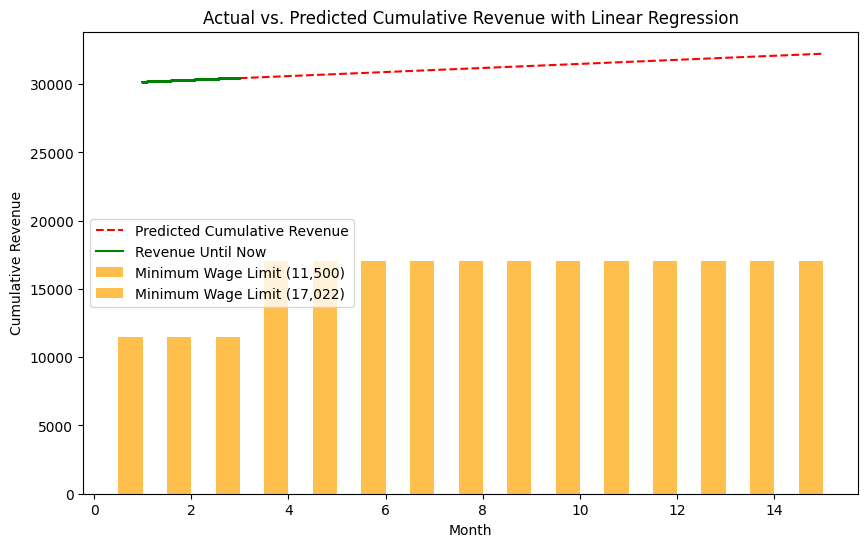

In [13]:
df['Month'] = np.tile(np.arange(1, 4), len(df)//3 + 1)[:len(df)]


X = df[['Month']]
y = df['Revenue'].cumsum()

model = LinearRegression()
model.fit(X, y)

next_months = pd.DataFrame({'Month': np.arange(3, 16)})
next_months['Predicted Cumulative Revenue'] = model.predict(next_months[['Month']])

plt.figure(figsize=(10, 6))
plt.plot(next_months['Month'], next_months['Predicted Cumulative Revenue'], color='red', label='Predicted Cumulative Revenue', linestyle='dashed')

plt.bar(df['Month'][:3] - 0.25, 11500, width=0.5, color='orange', alpha=0.7, label='Minimum Wage Limit (11,500)')
plt.bar(next_months['Month'][1::] - 0.25, 17022, width=0.5, color='orange', alpha=0.7, label='Minimum Wage Limit (17,022)')

plt.plot(X, model.predict(X), color='green', label='Revenue Until Now')
plt.title('Actual vs. Predicted Cumulative Revenue with Linear Regression')
plt.xlabel('Month')
plt.ylabel('Cumulative Revenue')
plt.legend()
plt.show()

Accuracy: 0.71


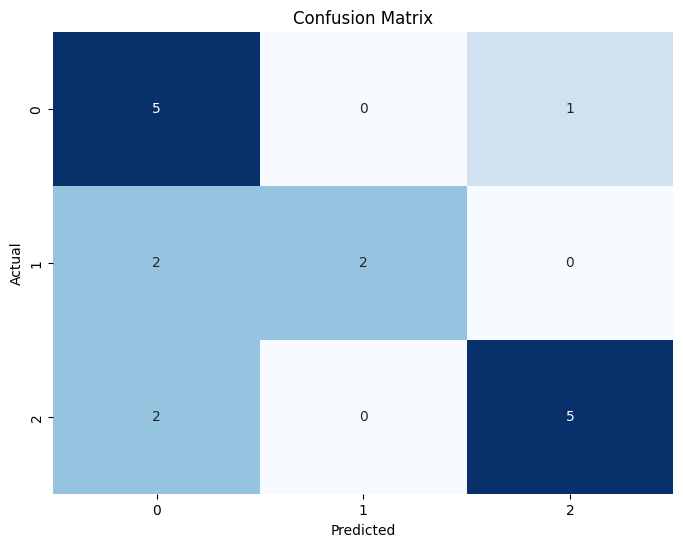

In [14]:

df['Initial Digit'] = df['Product Code'].astype(str).str[0]


X = df[['Num. Bought Pieces', 'Cost', 'Num. of Sold Pieces', 'Price']]
y = df['Initial Digit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()